# Week 4 - Notebook

In [1]:
!conda install -c conda-forge geopy --yes 
!conda install -c conda-forge folium=0.5.0 --yes

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    geographiclib-1.49         |             py_0          32 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          90 KB

The following NEW packages will be INSTALLED:

    geographiclib: 1.49-py_0   conda-forge
    geopy:         1.20.0-py_0 conda-forge


geopy-1.20.0         | 57 KB     | ##################################### | 100% 
geographiclib-1.49   | 32 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done
Solving environment: done

# All requested packages

In [2]:
from geopy.geocoders import Nominatim
import requests 
import pandas as pd 
import numpy as np 
import random
from IPython.display import Image 
from IPython.core.display import HTML 
from pandas.io.json import json_normalize
import folium 

In [3]:
CLIENT_ID = 'SL11CAE1LMKJJTDMFAZJW24BM2DWREAKXSXJPYC3UNPRXM4C' 
CLIENT_SECRET = 'TANQK3RJZJIVE1NLVHGH314ZOVY3J4IJUOU3LGWQ4HMX4FOY' 
VERSION = '20180604'
LIMIT = 99

In [6]:
latitude = 43.653908
longitude = -79.384293
search_query = 'restaurant'
radius = 5000
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
results = requests.get(url).json()
# assign relevant part of JSON to venues
venues = results['response']['groups'][0]['items']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 22 columns):
reasons.count                      99 non-null int64
reasons.items                      99 non-null object
referralId                         99 non-null object
venue.categories                   99 non-null object
venue.id                           99 non-null object
venue.location.address             98 non-null object
venue.location.cc                  99 non-null object
venue.location.city                99 non-null object
venue.location.country             99 non-null object
venue.location.crossStreet         67 non-null object
venue.location.distance            99 non-null int64
venue.location.formattedAddress    99 non-null object
venue.location.labeledLatLngs      99 non-null object
venue.location.lat                 99 non-null float64
venue.location.lng                 99 non-null float64
venue.location.neighborhood        13 non-null object
venue.location.postalCode        

In [7]:
df=pd.DataFrame()
df['venue_ID']=dataframe['venue.id']
df['name']=dataframe['venue.name']
df['lat']=dataframe['venue.location.lat']
df['lng']=dataframe['venue.location.lng']
df.head()

,venue_ID,name,lat,lng
0,506db1a9e4b0a3f3b31412f0,Richmond Station,43.651569,-79.379266
1,537773d1498e74a75bb75c1e,Eggspectation Bell Trinity Square,43.653144,-79.381980
2,5615b6c4498e3c32c67ad78f,Blaze Pizza,43.656518,-79.380015
3,51755dc7498ece19b7261641,Banh Mi Boys,43.659188,-79.382131
4,4ad69511f964a520e40721e3,The Keg Steakhouse & Bar,43.649937,-79.384196


In [8]:
map_torronto = folium.Map(location=[latitude, longitude], zoom_start=13)

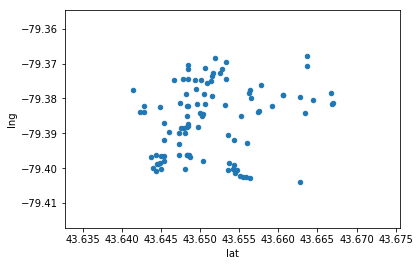

In [9]:
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt # plotting library


%matplotlib inline

df.plot(x='lat',y='lng',kind='scatter')

In [10]:
k_means = KMeans(init = "k-means++", n_clusters = 4, n_init = 12)
df_array=np.array(df[['lat','lng']])
k_means.fit(df_array)
k_labels=pd.DataFrame(k_means.labels_)
k_labels.info()
df['cluster']=k_labels
df.groupby('cluster').count()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 1 columns):
0    99 non-null int32
dtypes: int32(1)
memory usage: 476.0 bytes


,venue_ID,name,lat,lng
cluster,,,,
0,33,33,33,33
1,27,27,27,27
2,22,22,22,22
3,17,17,17,17


In [11]:
for lat, lng, name,venue_ID,cluster in zip(df['lat'], df['lng'], df['name'],df['venue_ID'],df['cluster']):
    
    if cluster == 0:
        label = '{}, {}'.format(name, venue_ID)
        label = folium.Popup(label, parse_html=True)
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            color='blue',
            fill=True,
            fill_color='blue',
            fill_opacity=0.7,
            parse_html=False).add_to(map_torronto)  
    if cluster == 1:
        label = '{}, {}'.format(name, venue_ID)
        label = folium.Popup(label, parse_html=True)
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            color='red',
            fill=True,
            fill_color='red',
            fill_opacity=0.7,
            parse_html=False).add_to(map_torronto)  
    if cluster == 2:
        label = '{}, {}'.format(name, venue_ID)
        label = folium.Popup(label, parse_html=True)
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            color='green',
            fill=True,
            fill_color='green',
            fill_opacity=0.7,
            parse_html=False).add_to(map_torronto)  
    if cluster == 3:
        label = '{}, {}'.format(name, venue_ID)
        label = folium.Popup(label, parse_html=True)
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            color='purple',
            fill=True,
            fill_color='purple',
            fill_opacity=0.7,
            parse_html=False).add_to(map_torronto)  
    
map_torronto

In [12]:
center_location=df.groupby('cluster').mean()
center_location

,lat,lng
cluster,,
0,43.650090,-79.398597
1,43.648179,-79.385733
2,43.650011,-79.374150
3,43.661219,-79.379013


In [14]:
i=0
for lat, lng in zip(center_location['lat'],center_location['lng']):
    folium.Marker([lat,lng], popup='Recommend for Group '+ str(i)).add_to(map_torronto)
    i=i+1
map_torronto